In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

data collection and analysis


In [2]:
data=pd.read_csv("/content/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data analysis

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


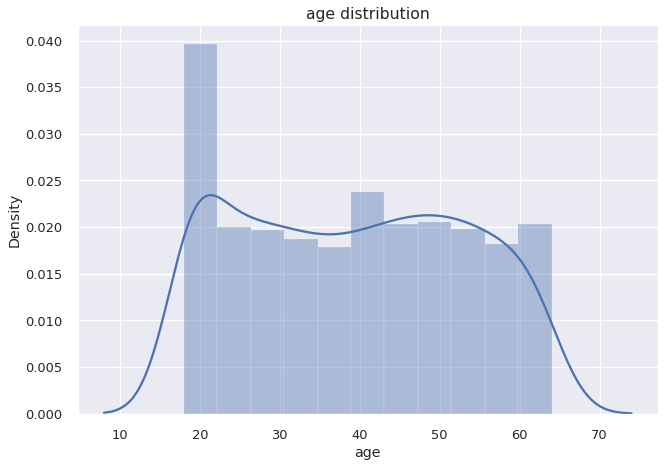

In [9]:
sns.set()
plt.style.use("seaborn-talk")
sns.distplot(data["age"])
plt.title("age distribution")
plt.show()

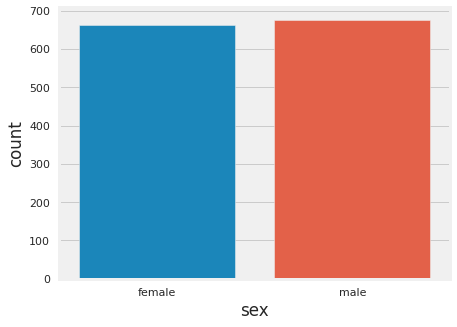

In [10]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("fivethirtyeight")
sns.countplot(x="sex",data=data)
plt.show()

In [11]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


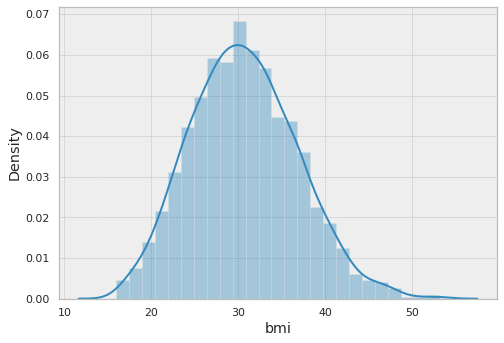

In [12]:
sns.set()
plt.figure(figsize=(7,5))
sns.color_palette("hls", 8)
plt.style.use("bmh")
sns.distplot(data["bmi"])
plt.show()

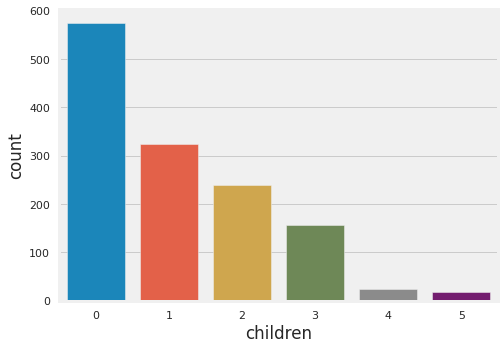

In [13]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("fivethirtyeight")
sns.countplot(x="children",data=data)
plt.show()

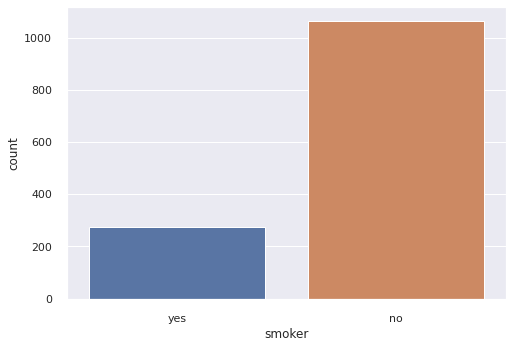

In [14]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("fast")
sns.countplot(x="smoker",data=data)
plt.show()

In [15]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

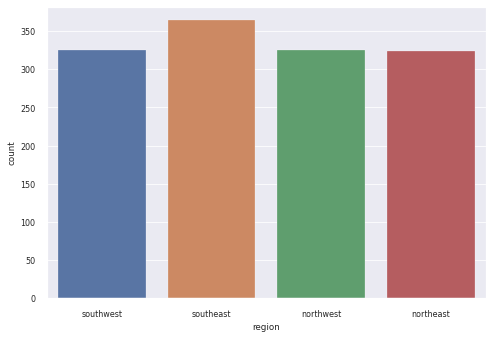

In [16]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("seaborn-paper")
sns.countplot(x="region",data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


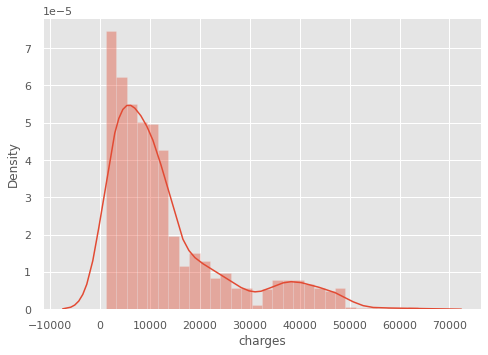

In [17]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("ggplot")
sns.distplot(data["charges"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


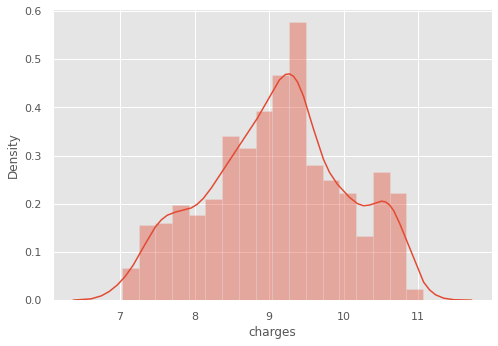

In [18]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("ggplot")
sns.distplot(np.log(data["charges"]))
plt.show()

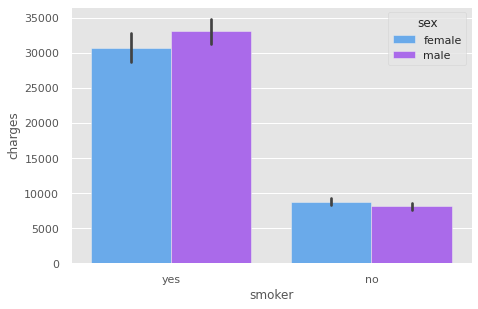

In [19]:
sns.barplot(x='smoker', y='charges', hue='sex', data=data, palette='cool')

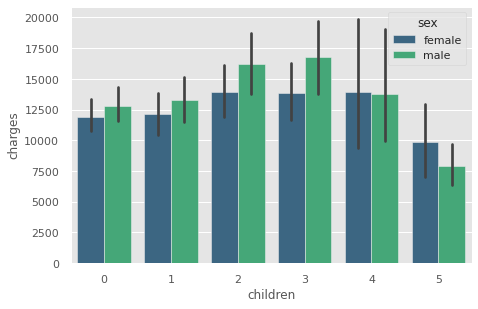

In [20]:
sns.barplot(x='children', y='charges', hue='sex', data=data, palette='viridis')

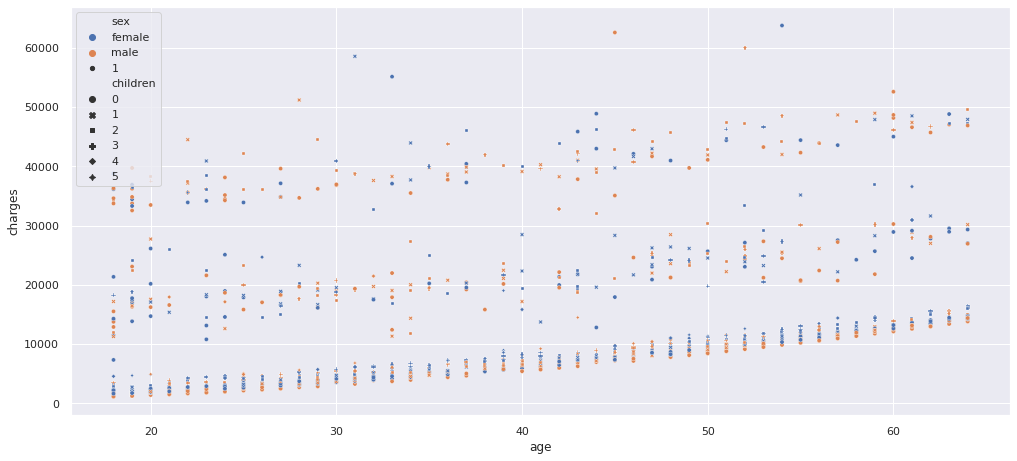

In [21]:
sns.set()
plt.figure(figsize=(15,7))
sns.scatterplot(x="age",y="charges",hue="sex",style="children",data=data,size=1)
plt.legend()

data preprocessing

encoding categorical features

In [22]:
data.replace({"sex":{"male":0,"female":1}},inplace=True)

In [23]:
data.replace({"smoker":{"yes":1,"no":0}},inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["region"] = lb.fit_transform(data["region"])

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


modelling

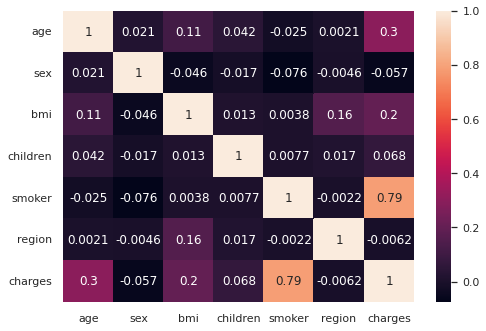

In [34]:
sns.set()
plt.figure(figsize=(7,5))
plt.style.use("fast")
sns.heatmap(data.corr(),annot=True)

In [96]:
x=data.drop(["charges","region","sex"],axis=1)
y=data[["charges"]]

In [97]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

In [98]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score


In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print('[0] Linear Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(lr.score(xtest,ytest))

[0] Linear Regression Test Error:  5672.010981341249
0.7978274606303823


In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print('[1] K neighbors Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(knn.score(xtest,ytest))

[1] K neighbors Regression Test Error:  10766.215392870123
0.27159290309492456


In [101]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)
print('[2] SVR linear Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(svr.score(xtest,ytest))

[2] SVR linear Regression Test Error:  13250.275642903727
-0.10331079107228791


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
from sklearn.tree import DecisionTreeRegressor
dcr=DecisionTreeRegressor()
dcr.fit(xtrain,ytrain)
ypred=dcr.predict(xtest)
print('[3] Decision Tree Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(dcr.score(xtest,ytest))

[3] Decision Tree Regression Test Error:  6512.141319091481
0.7335009451333095


In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)
print('[4] Random Forest Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(rfr.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[4] Random Forest Regression Test Error:  4722.280341765916
0.859863401581864


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
print('[5] Gradient Boosting Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(gb.score(xtest,ytest))

[5] Gradient Boosting Regression Test Error:  4045.8871466592473
0.8971331195921077


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print('[6] XGBoost Regression Test Error: ',np.sqrt(mean_squared_error(ytest,ypred)))
print(xgb.score(xtest,ytest))

[07:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[6] XGBoost Regression Test Error:  4007.109216895303
0.899095531464883


In [106]:
def mape(ytest, ypred): 
    ytest, ypred = np.array(ytest), np.array(ypred)
    return np.mean(np.abs((ytest - ypred) / ytest)) * 100

In [107]:
mape(ytest,ypred)

175.32049635103738

In [108]:
result = pd.concat([pd.DataFrame(ytest).reset_index(), pd.DataFrame(ypred,columns=["prediction"])],axis=1)
del result["index"]
result

,charges,prediction
0,9724.53000,12852.374023
1,8547.69130,10097.718750
2,45702.02235,45155.531250
3,12950.07120,13498.142578
4,9644.25250,10365.428711
...,...,...
263,15019.76005,17804.445312
264,6664.68595,7621.540527
265,20709.02034,11386.968750
266,40932.42950,40738.378906


In [109]:
Importance = pd.DataFrame({"Importance": gb.feature_importances_*100},
                         index = xtrain.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

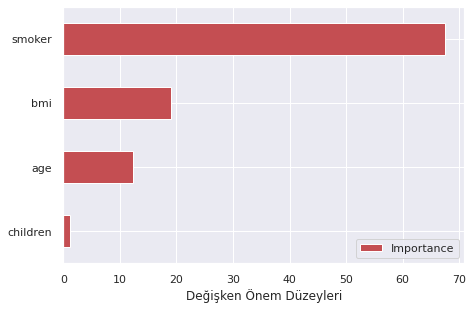

In [110]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")

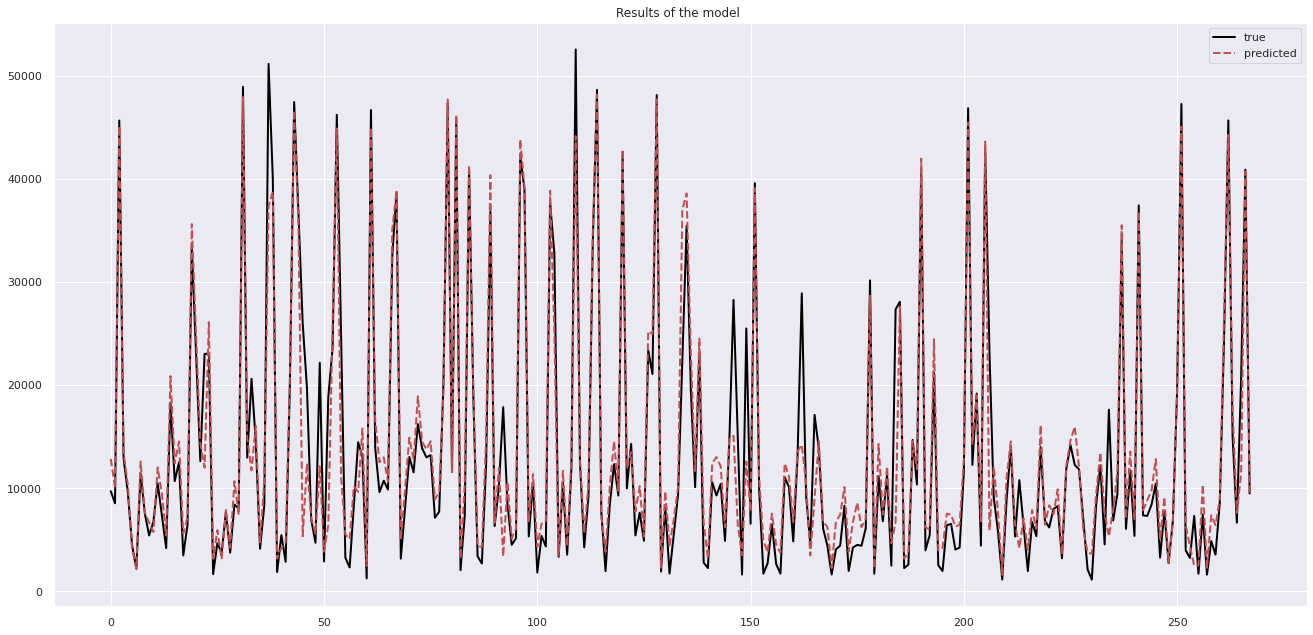

In [111]:
plt.figure(figsize=(20,10))
plt.plot(result["charges"], "black", linewidth=2)
plt.plot(result["prediction"], "r--", linewidth = 2)
plt.legend(["true","predicted"])
plt.title("Results of the model ")
plt.show()

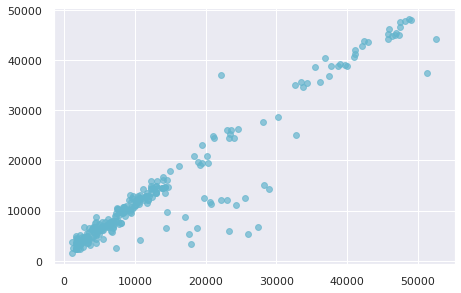

In [112]:
plt.scatter(x=ytest,y=ypred,c = 'c', marker = 'o', s = 35, alpha = 0.7)

In [115]:
input=(19,27.9,0,1)
input_as=np.asarray(input)
input_re=input_as.reshape(1,-1)
ypred=gb.predict(input_re)
print(ypred)

[17987.41404467]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
